In [5]:
import os
import json
import time 
import numpy as npy
import tqdm


img_dir     = '/home/csgrad/sahmed9/reps/chartinfo-cqa/dataset/all_test_train_22/images'
cjson_dir   = '/home/csgrad/sahmed9/reps/chartinfo-cqa/dataset/all_test_train_22/jsons'
json_dir    = '/home/csgrad/sahmed9/reps/chartinfo-cqa/dataset/cqa_22_with_id/combined'
filter_list = '/home/csgrad/sahmed9/reps/chartinfo-cqa/dataset/cqa_22_with_id/test_filenames.txt'
tax_id_map = npy.load('/home/csgrad/sahmed9/reps/RealCQA/code/evaluation/t_id_map.npy', allow_pickle=True)

In [6]:
os.listdir('/home/csgrad/sahmed9/reps/RealCQA/code/evaluation/')

['s3.npy',
 's5.npy',
 'README.md',
 'ctype_id_map.npy',
 's4.npy',
 'eval_PMC.py',
 's2.npy',
 't_id_map.npy',
 'summ',
 'combine.py']

In [7]:
json_files = os.listdir(json_dir)
print(len(json_files), json_files[0])
filter_test_id = None 
# filter_test_id = [text.strip() for text in open(filter_list, 'r').readlines()]

28266 PMC5503343___materials-10-00260-g009.json


In [8]:
def get_agg_tid(tid_obj) :
    at_ = ['1', '2', '3', '4']
    agg_t = {}
    for t_ in tid_obj :
        _ = t_[:1]
        k = at_.index(_)    
        if k+1 in agg_t :
            agg_t[k+1]+= list(tid_obj[t_])
        else :
            agg_t[k+1]= list(tid_obj[t_])
    return agg_t

tidobj = tax_id_map.item()
agg = get_agg_tid(tidobj)
for i in agg : 
    print('Taxonomy level : ',i, len(agg[i]))

Taxonomy level :  2 36354
Taxonomy level :  1 11952
Taxonomy level :  3 9256
Taxonomy level :  4 315200


In [9]:
print('\n In create questions')
print('Total Images', len(json_files))
unused_count = 0
questions = []
start_time = time.time()
for js in tqdm.tqdm(json_files) : 
    if filter_test_id is not None : 
        if js[:-5] not in filter_test_id:
            unused_count+=1
            continue
    jsn_list = json.load(open(os.path.join(json_dir, js), 'r'))
    questions.extend(jsn_list)  

    start_time = time.time() - start_time
print(f"Elapsed time to create qs: {start_time} seconds ={start_time/60} minutes")
print('Total unused/used images:', unused_count, '/', len(json_files)-unused_count)

for idx in range(len(questions)):
    q_block  = questions[idx]
    qa_id    = q_block['qa_id']
    pmc_id   = q_block['PMC_ID']
    answer   = q_block['answer']
    question = q_block['question']
    print(q_block)
    break


 In create questions
Total Images 28266


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 28266/28266 [03:08<00:00, 149.79it/s]

Elapsed time to create qs: 1712247842.1073565 seconds =28537464.03512261 minutes
Total unused/used images: 0 / 28266
{'taxonomy id': '2e', 'QID': '3', 'question': 'Where does the legend appear in the chart?', 'answer': 'Upper Left', 'answer_type': 'String', 'qa_id': 'iVmUQBBiryrH', 'PMC_ID': 'PMC5503343___materials-10-00260-g009'}


In [10]:
def return_by_id(id_) :
    agg = []
    for q_block in questions:
        if q_block['QID'] == id_ :
            agg.append(q_block)
    return agg

In [11]:
c = 0
for idx in range(len(questions)):
    q_block  = questions[idx]
    qa_id    = q_block['qa_id']
    pmc_id   = q_block['PMC_ID']
    answer   = q_block['answer']
    question = q_block['question']
    if q_block['QID'] == '63' :
        for q in q_block : 
            print(q, '::', q_block[q])
        print('\n')
        c+=1
    
    if c> 2 : 
        break

taxonomy id :: 4b
QID :: 63
question :: Is the difference between the value of 'Foliar spot growth (cm / 9 days)' at 55 and 491 greater than the difference between any two 'Light intensity (\mu mol m^{-2} s^{-1})'?
answer :: no
answer_type :: Binary
qa_id :: YheQWPyAYGmw
PMC_ID :: PMC3031546___2


taxonomy id :: 4b
QID :: 63
question :: Is the difference between the value of 'Foliar spot growth (cm / 9 days)' at 55 and 1058 greater than the difference between any two 'Light intensity (\mu mol m^{-2} s^{-1})'?
answer :: yes
answer_type :: Binary
qa_id :: YRwkjgYWiXMp
PMC_ID :: PMC3031546___2


taxonomy id :: 4b
QID :: 63
question :: Is the difference between the value of 'Foliar spot growth (cm / 9 days)' at 491 and 1058 greater than the difference between any two 'Light intensity (\mu mol m^{-2} s^{-1})'?
answer :: yes
answer_type :: Binary
qa_id :: sviknlIAYILa
PMC_ID :: PMC3031546___2




In [113]:
tx_obj = {}
for idx in range(len(questions)):
    q_block  = questions[idx]
    if q_block['taxonomy id'] in tx_obj :
        tx_obj[q_block['taxonomy id']] +=1
    else : 
        tx_obj[q_block['taxonomy id']]  = 0


In [114]:
tx_obj

{'2e': 11792,
 '2g': 30228,
 '2b': 26427,
 '3a': 8545,
 '2j': 59009,
 '2c': 37309,
 '1a': 36752,
 '2a': 21645,
 '1b': 6484,
 '4b': 1722429,
 '2i': 10760,
 '3b': 51127,
 '2h': 2158}

In [122]:
ans_type_obj = {}
answer_type_ID = []
for idx in range(len(questions)):
    q_block  = questions[idx]
    if q_block['answer_type'] in ans_type_obj :
        ans_type_obj[q_block['answer_type']] +=1
    else : 
        ans_type_obj[q_block['answer_type']]  = 0
    if q_block['answer_type'] =='Binary':     
        answer_type_ID.append(q_block['QID'])


In [123]:
print(ans_type_obj,  len(answer_type_ID))

{'String': 91529, 'Numerical': 686358, 'Ranked List': 95794, 'Binary': 869030, 'String/Unranked List': 37650, 'Unranked List': 244311} 869031


In [126]:
## BINARY ID 
print(len(set(answer_type_ID)))
print(set(answer_type_ID))

36
{'89', '16', '29', '146', '72', '75', '169', '121', '59', '62', '91', '68', '124', '73a', '18a', '35', '63a', '27', '16a', '1', '122', '10', '170', '123', '116', '63', '73', '28a', '74', '18', '65a', '167', '168', '166', '65', '117'}


In [50]:
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM

device = "cuda"

tokenizer = AutoTokenizer.from_pretrained("humarin/chatgpt_paraphraser_on_T5_base")

model = AutoModelForSeq2SeqLM.from_pretrained("humarin/chatgpt_paraphraser_on_T5_base").to(device)

def paraphrase(
    question,
    num_beams=5,
    num_beam_groups=5,
    num_return_sequences=5,
    repetition_penalty=10.0,
    diversity_penalty=3.0,
    no_repeat_ngram_size=2,
    temperature=0.7,
    max_length=128
):
    input_ids = tokenizer(
        f'paraphrase: {question}',
        return_tensors="pt", padding="longest",
        max_length=max_length,
        truncation=True,
    ).input_ids
    input_ids = input_ids.to(device)
    outputs = model.generate(
        input_ids, temperature=temperature, repetition_penalty=repetition_penalty,
        num_return_sequences=num_return_sequences, no_repeat_ngram_size=no_repeat_ngram_size,
        num_beams=num_beams, num_beam_groups=num_beam_groups,
        max_length=max_length, diversity_penalty=diversity_penalty
    )

    res = tokenizer.batch_decode(outputs, skip_special_tokens=True)

    return res


 To convert a question about a chart with binary answers to first-order logic (FOL), we need to298
 represent the relevant structural elements of the chart and the relationships between them. One299
 possible approach to this is as follows:300
 Define a set of variables to represent the structural elements of the chart. For example, we can define301
 variables302
 1. x-axis title (Xtitle)
 2. ith x-axis tick marks (Xi)
 3. closed range of values of x-ticks [x0, xn]
 4. y-axis title (Ytitle)
 5. jth y-axis tick mark (Yj )
 6. closed range of values of y-ticks [y0, ym]
 7. legend labels (Legendlabel) 
 8. kth legend label (Lk)
 9. closed range of values of legends ie data series names [l0, lh]
 10. i+1/j+1 represents successive ith/jth value of respective variable
 
 median ???
 
 Define a set of predicates to represent the relationships between the chart elements. For example, we314
 can define predicates such as Let C be a chart. Then, C has the following predicates defined :
 
 1. ∃({Xi0, ..., Xin}, Xtitle): for all X ticks of Xtitle in C, there exist given set of X tick316
 values, where Xi denotes the i-th X tick value.
 
 2. ∃({Yj0, ..., Yjm}, Ytitle): for all Y ticks of Ytitle in C, there exist given set of Y tick values,318
 where Yj denotes the j-th Y tick value.
 
 3. ∃({Lh0, ..., Lhk}, Legendlabel): for all labels in Legendlabel in C, there exist set of given320
 labels, where Lk denotes the k-th label.
 
 4. V alue_At({(Xi0, Yj0), (...), (Xin, Yjm)}, Ytitle): the value of Ytitle at each data point (Xi0, Yj0), ..., (Xin, Yjm) exists in C.
 
 5. V alue_At({(Xi0, Yj0, Lk0), (...), (Xin, Yjm, Lkh)}, Ytitle, Legendlabel): the value of Ytitle for the k-th given Legendlabel, Lkh at each data point in {(Xi0, Yj0, Lk0), (...)} exists in C .
 
 6. M ax_V alue((Xi, Yj ), Ytitle): the data point represented by (Xi, Yj ) is the maximum value of Ytitle across all data points in C.
 
 7. Max_V alue((Xi, Yj , Lk), Ytitle, Legendlabel): the data point represented by (Xi, Yj ) is the maximum value of Ytitle for the given Legendlabel across all data points in C.
 
 
 These conditions ensure that the chart C has valid and complete data, as well as allowing for331
 comparison of data across different data points and legends.
 Define the question in natural language and map it to FOL using the defined variables and predicates.

In [8]:
p0 = ['__i0__ is not equal to __i1__ and less than __i1__. Both __i1__ and __i0__ are in the range __minX__ to __maxX__']
# paraphrase(p0)
'''
["There is a value for ['________0_F]: it is not equivalent to the given value, and neither is greater than the specified value.",
 "There is a value for ['________0_F]: it is not equivalent to the given value, and neither is greater than the specified value. The values for this are in the range of __minXY_ F and -_maxX_D respectively.",
 "The value of ['__i0________ is not equal to _,_, and less than._I1_Seq]; the values of both arithmetic (passive) and realty (extent) are in the range x(centre) from XminX_F and maxXY_O].",
 "Not equal to ________i0.bout ', not equivalent to [' and d] are also not equal with [and] (both @-) and @(total) are in range of /-100 and +-200 respectively.",
 "__i1--> '_________= (_)_/(_%_f....) +,? @_t_up.... N = 1 : p_@_ţ_+ P dxDXK DBP[/word]. A [TFATCHA FILE MAIL] is not an acceptable range for the length of time given by this function. This statement does not include any other values of formal grammar or punctuation marks."]
'''
p0i0 = ['__i0__ is not equal to __i1__. Both __i1__ and __i0__ are in the range __minX__ to __maxX__', 
      'There is a value for __i0__, it is not equivalent to __i1__. Both the values for this are in the range of __minX__ to __maxX__ respectively.',
      '__i1__ is either greater or less than __i0__ and both  are in range of __minX__ to __maxX__.'
     ]
p0j0 = ['__j0__ is not equal to __j1__. Both __j1__ and __j0__ are in the range __minY__ to __maxY__', 
      'There is a value for __j0__, it is not equivalent to __j1__. Both the values for this are in the range of __minY__ to __maxY__ respectively.',
      '__j1__ is either greater or less than __j0__ and they  are in range of __minY__ to __maxY__.'
     ]

p0i2 = ['__i2__ is not equal to __i3__. Both __i2__ and __i3__ are in the range __minX__ to __maxX__', 
      'There is a value for __i2__, it is not equivalent to __i3__. Both the values for this are in the range of __minX__ to __maxX__ respectively.',
      '__i2__ is either greater or less than as __i3__ and both  are in range of __minX__ to __maxX__.'
     ]
p0j2 = ['__j2__ is not equal to __j3__. Both __j3__ and __j2__ are in the range __minY__ to __maxY__', 
      'There is a value for __j2__, it is not equivalent to __j3__, and neither is greater than the specified value. Both the values for this are in the range of __minY__ to __maxY__ respectively.',
      '__j3__ is either greater or less than __j2__ and both  are in range of __minY__ to __maxY__.'
     ]


In [9]:
# Premise Templates and Paraphrase
p_xrange = "For the independant axis titled __Xtitle__ thr range of tick values represented are __minX__ to __maxX__"
# paraphrase(p_xrange)
'''
['The range of tick values for the independant axis titled __Xtitle________ is from 0 to 100.',
 '__inDEPTH: The tick values for the independant axis titled _______title_F.',
 "For the __Xtitle's independant axis, the range of tick values is 0 to a maximum of one.",
 '__inDEPTH: The tick values for the independant axis titled _______title_F. Numerical?',
 'The tick values for the __Xtitle________ and independant dimensions are from minX_0 to maxXY_180.']
 '''

p_xrange = [
    "For the independant axis titled __Xtitle__ the range of tick values represented are __minX__ to __maxX__",
    "The range of tick values for the independant axis titled __Xtitle__ is from __minX__ to __maxX__.", 
    "__minX__ to __maxX__: The valid tick values range for the independant axis titled __Xtitle__ in the given chart", 
    '__Xi0__ and __Xi1 are valid values for ticks on x axis', 
    'Valid values for ticks on indepandant axis include __Xi0__ and __Xi1'
]
    

In [10]:
p_yrange = "For the dependant axis in the chart titled __Ytitle__ the range of tick values represented are __minY__ to __maxY__"
# paraphrase(p_yrange)
'''
['The dependant axis on the chart __Ytitle_ has tick values that span from 0 to 100.',
 'In the chart named __Ytitle_, the range of tick values for the dependant axis in this chart is numbered from 0 to 100.',
 'On this chart, the dependant axis on __Ytitle_ is represented by tick values from 0 to 100.',
 'The dependant axis on the chart __Ytitle_ has tick values that span from 0 to 100. Click here to view the full range of possible options.',
 'The chart titled "Ytitle__Fallout" displays tick values from ________min to \'_-maxY_() for the dependant axis.']
'''
p_yrange = [
    'For the dependant axis in the chart titled __Ytitle__ the range of tick values represented are __minY__ to __maxY__.',
    'The range of tick values for the dependant axis having the title, __Ytitle__ in this chart is from __minY__ to __maxY__.',
    'The dependant axis titled __Ytitle__ displays tick values from __minY__ to __maxY__ for this chart.'
    'The dependant axis __Ytitle__ on the chart  has tick values that span from __minY__ to __maxY__.', 
    '__Yi0__ and __Yi1__ are valid values for ticks on y axis', 
    'Valid values for ticks on depandant axis include __Yi0__ and __Yi1__'
]

In [11]:
p_Val = 'Value in the chart plot area exists at (__Xi0__ , __Yi0__), (__Xi1__ , __Yi1__) for the axis called __Ytitle__'
# paraphrase(p_Val)
["The axis of __Ytitle________ has values at points (_Xi0_, '_yio0foo'), corresponding to the point in brackets (named by the number of stars on the graph and given by an operator). What is the value for the line with lines drawn along the top of the plot?",
 "The axis of __Ytitle________ has values at points (_Xi0_, '_yio0foo'), corresponding to the point in brackets (named by the number of stars on the graph and given by an operator).",
 'For the axis of __Ytitle________, there are values at (_Xi0_, \'_yi0-_) and (corresponding to x in @subject line), but not for a particular number. The value is also shown as follows: "At the time of this analysis, the plot will be known as babel.',
 'For the axis of __Ytitle________, there are values at (_Xi0_, \'_yi0-_) and (corresponding to x in @subject line), but not for a particular number. The value is also shown as follows: "At the time of this analysis, the plot will be known as babel.jpg',
 "For the axis of __Ytitle________, there are values at (_Xi0_, '_yi0-_) and (corresponding to x in @subject line), but not for a particular number."]

p_Val = [
    'Value in the chart plot area exists at (__Xi0__ , __Yi0__), (__Xi1__ , __Yi1__) for the axis called __Ytitle__', 
    'The axis of __Ytitle__ has values at points (__Xi0__ , __Yi0__), (__Xi1__ , __Yi1__)', 
    'For the axis of __Ytitle__, there are valid plot values corresponding to (__Xi0__ , __Yi0__), (__Xi1__ , __Yi1__)'
]

In [12]:
p63 = ' The difference in the values of the plot at (Xi0, Yi0),(Xi1, Yj1) is greater than the difference of values in the plot at  (Xi2, Yj2),  (Xi3, Yj3)'

In [13]:
q63 = [p0, p0i0, p0j0, p0i2, p0j2, p_xrange, p_yrange, p_Val, p63]

In [15]:
for p_ in q63 : 
    print('\n')
    for __ in p_ : 
        print(__)
        



__i0__ is not equal to __i1__ and less than __i1__. Both __i1__ and __i0__ are in the range __minX__ to __maxX__


__i0__ is not equal to __i1__. Both __i1__ and __i0__ are in the range __minX__ to __maxX__
There is a value for __i0__, it is not equivalent to __i1__. Both the values for this are in the range of __minX__ to __maxX__ respectively.
__i1__ is either greater or less than __i0__ and both  are in range of __minX__ to __maxX__.


__j0__ is not equal to __j1__. Both __j1__ and __j0__ are in the range __minY__ to __maxY__
There is a value for __j0__, it is not equivalent to __j1__. Both the values for this are in the range of __minY__ to __maxY__ respectively.
__j1__ is either greater or less than __j0__ and they  are in range of __minY__ to __maxY__.


__i2__ is not equal to __i3__. Both __i2__ and __i3__ are in the range __minX__ to __maxX__
There is a value for __i2__, it is not equivalent to __i3__. Both the values for this are in the range of __minX__ to __maxX__ respecti

In [27]:
q63q = return_by_id('63')
print(len(q63q),q63q[0])


13236 {'taxonomy id': '4b', 'QID': '63', 'question': "Is the difference between the value of 'Foliar spot growth (cm / 9 days)' at 55 and 491 greater than the difference between any two 'Light intensity (\\mu mol m^{-2} s^{-1})'?", 'answer': 'no', 'answer_type': 'Binary', 'qa_id': 'YheQWPyAYGmw', 'PMC_ID': 'PMC3031546___2'}


***

65 : Is the sum of the value of < Y title > for < ith x tick > and < (i + 1)th x tick > greater than the maximum value of < Y title > across all < pluralf orm of X title > ?
 
 ∃i, (i + 1) ∈ [x0, xn], j0, j1 ∈ [y0, ym] : (j0 ̸ = j1) ∧
 ∃({Xi, Xi+1}, Xtitle) ∧
 ∃({Yj0, Yj1}, Ytitle) ∧
 V alue_At((Xi, Yj0), (Xi+1, Yj1, Ytitle) ∧
 ∃i2 ∈ [x0, xn], j2 ∈ [y0, ym] ∧
 ∃({Xi2}, Xtitle) ∧
 ∃({Yj2}, Ytitle) ∧
 M ax_V alue((Xi2, Yj2), Ytitle) ∧
 (Xi, Yj0) + (Xi+1, Yj1 > (Xi2, Yj2) → True
 
 

In [34]:
pMax = 'The value for __Ytitle__ is maximum at (__Xi0__ , __Yi0__)'
paraphrase(pMax)
pMax = [
    'The value for __Ytitle__ is maximum at (__Xi0__ , __Yi0__)', 
    'The maximum value of __Ytitle__, exists at (__Xi0__ , __Yi0__)', 
    'Maximum __Ytitle__ is at (__Xi0__ , __Yi0__)'
]
        

['At the maximum limit of ________Ytitle_, there exists a value of (_Xi0.',
 "__Ytitle_______ is the highest value that can be obtained at (_Xi0_-, '.",
 'Maximum __Ytitle________ is at (_Xi0_',
 'Maximum __Ytitle________ is at (_Xi0_,.',
 "The maximum limit of ________title_ is at (__Xi0_(), '_Yi0-')."]

In [31]:
'''
taxonomy id :: 4b
QID :: 63
question :: Is the difference between the value of 'Foliar spot growth (cm / 9 days)' at 55 and 491 greater than the difference between any two 'Light intensity (\mu mol m^{-2} s^{-1})'?
answer :: no
answer_type :: Binary
qa_id :: YheQWPyAYGmw
PMC_ID :: PMC3031546___2


taxonomy id :: 4b
QID :: 63
question :: Is the difference between the value of 'Foliar spot growth (cm / 9 days)' at 55 and 1058 greater than the difference between any two 'Light intensity (\mu mol m^{-2} s^{-1})'?
answer :: yes
answer_type :: Binary
qa_id :: YRwkjgYWiXMp
PMC_ID :: PMC3031546___2


taxonomy id :: 4b
QID :: 63
question :: Is the difference between the value of 'Foliar spot growth (cm / 9 days)' at 491 and 1058 greater than the difference between any two 'Light intensity (\mu mol m^{-2} s^{-1})'?
answer :: yes
answer_type :: Binary
qa_id :: sviknlIAYILa
PMC_ID :: PMC3031546___2

63 : Is the difference between the value of < Y title > at < i0 x tick > and < i1 x tick > greater than the difference between any two < plural f orm of X − title >?
 ∃i0, i1 ∈ [x0, xn], j0, j1 ∈ [y0, ym] : (i0 ̸ = i1), (j0 ̸ = j1) ∧
 ∃({Xi0, Xi1}, Xtitle) ∧
 ∃({Yj0, Yj1}, Ytitle) ∧
 Value_At((Xi0, Yj0), (Xi1, Yj1, Ytitle) ∧
 ∃i2, i3 ∈ [x0, xn], j2, j3 ∈ [y0, ym] : (i2 ̸ = i3), (j2 ̸ = j3) ∧
 ∃({Xi2, Xi3}, Xtitle) ∧
 ∃({Yj2, Yj3}, Ytitle) ∧
 Value_At((Xi2, Yj2), (Xi3, Yj3), Ytitle) ∧
 |((Xi0, Yi0) − (Xi1, Yj1))| > |((Xi2, Yj2) − (Xi3, Yj3))| ⇒ True
 '''

"\ntaxonomy id :: 4b\nQID :: 63\nquestion :: Is the difference between the value of 'Foliar spot growth (cm / 9 days)' at 55 and 491 greater than the difference between any two 'Light intensity (\\mu mol m^{-2} s^{-1})'?\nanswer :: no\nanswer_type :: Binary\nqa_id :: YheQWPyAYGmw\nPMC_ID :: PMC3031546___2\n\n\ntaxonomy id :: 4b\nQID :: 63\nquestion :: Is the difference between the value of 'Foliar spot growth (cm / 9 days)' at 55 and 1058 greater than the difference between any two 'Light intensity (\\mu mol m^{-2} s^{-1})'?\nanswer :: yes\nanswer_type :: Binary\nqa_id :: YRwkjgYWiXMp\nPMC_ID :: PMC3031546___2\n\n\ntaxonomy id :: 4b\nQID :: 63\nquestion :: Is the difference between the value of 'Foliar spot growth (cm / 9 days)' at 491 and 1058 greater than the difference between any two 'Light intensity (\\mu mol m^{-2} s^{-1})'?\nanswer :: yes\nanswer_type :: Binary\nqa_id :: sviknlIAYILa\nPMC_ID :: PMC3031546___2\n\n63 : Is the difference between the value of < Y title > at < i0 x t

In [37]:
p65 = 'The sum of the values at (A, B) and (C, D) is greater than the value at (E, F)'
paraphrase(p65)
# 'If (A, B) and (C, D) are added together, the sum is greater than the value at (E, F).',
#  'What is the sum of (A, B) and (C, D)? (E, F)',
#  'What is the sum of (A, B) and (C, D)? (E, F) =',
#  'What is the sum of (A, B) and (C, D)? (E, F) =.',
#  'What is the sum of (A, B) and (C, D)? (E, F) =.2.']
p65 = ['The sum of the values at (A, B) and (C, D) is greater than the value at (E, F)', 
   'If the plot values at (A, B) and (C, D) are added together, the sum is greater than the value at (E, F).']

['If (A, B) and (C, D) are added together, the sum is greater than the value at (E, F).',
 'What is the sum of (A, B) and (C, D)? (E, F)',
 'What is the sum of (A, B) and (C, D)? (E, F) =',
 'What is the sum of (A, B) and (C, D)? (E, F) =.',
 'What is the sum of (A, B) and (C, D)? (E, F) =.2.']

In [38]:
'''

taxonomy id :: 4b
QID :: 65
question :: Is the sum of the value of 'Relative sporulation %' in A^+Tra^- and A^-Tra^+ greater than the maximum value of 'Relative sporulation %' across all 'Strains'?
answer :: no
answer_type :: Binary
qa_id :: VYJzOLHesQXF
PMC_ID :: PMC3325183___pgen.1002626.g008


taxonomy id :: 4b
QID :: 65
question :: Is the sum of the value of 'Relative sporulation %' in A^-Tra^+ and A^-Tra^- greater than the maximum value of 'Relative sporulation %' across all 'Strains'?
answer :: no
answer_type :: Binary
qa_id :: nCmleOYQWYbS
PMC_ID :: PMC3325183___pgen.1002626.g008


taxonomy id :: 4b
QID :: 65
question :: Is the sum of the value of 'Relative sporulation %' in A^-Tra^- and A^-Tra^+/A^+Tra^+ greater than the maximum value of 'Relative sporulation %' across all 'Strains'?
answer :: no
answer_type :: Binary
qa_id :: myDfpVbjNEEB
PMC_ID :: PMC3325183___pgen.1002626.g008
'''

"\n\ntaxonomy id :: 4b\nQID :: 65\nquestion :: Is the sum of the value of 'Relative sporulation %' in A^+Tra^- and A^-Tra^+ greater than the maximum value of 'Relative sporulation %' across all 'Strains'?\nanswer :: no\nanswer_type :: Binary\nqa_id :: VYJzOLHesQXF\nPMC_ID :: PMC3325183___pgen.1002626.g008\n\n\ntaxonomy id :: 4b\nQID :: 65\nquestion :: Is the sum of the value of 'Relative sporulation %' in A^-Tra^+ and A^-Tra^- greater than the maximum value of 'Relative sporulation %' across all 'Strains'?\nanswer :: no\nanswer_type :: Binary\nqa_id :: nCmleOYQWYbS\nPMC_ID :: PMC3325183___pgen.1002626.g008\n\n\ntaxonomy id :: 4b\nQID :: 65\nquestion :: Is the sum of the value of 'Relative sporulation %' in A^-Tra^- and A^-Tra^+/A^+Tra^+ greater than the maximum value of 'Relative sporulation %' across all 'Strains'?\nanswer :: no\nanswer_type :: Binary\nqa_id :: myDfpVbjNEEB\nPMC_ID :: PMC3325183___pgen.1002626.g008\n"

In [ ]:
q65 = [p0, p0i0, p0j0, p0i2, p0j2, p_xrange, p_yrange, p_Val, pMax, p65]

In [ ]:
'''
taxonomy id :: 4b
QID :: 72
question :: Is it the case that in every 'Distance to dam site(km)', the sum of the value of 'Mean value of multicriteria flood risk' for Existing-condition and Dam rehabilitation is greater than the value of  'Mean value of multicriteria flood risk' for Dam decommisioning?
answer :: yes
answer_type :: Binary
qa_id :: PzqRwWWRGzie
PMC_ID :: PMC3108115___ijerph-08-01368f9


taxonomy id :: 4b
QID :: 72
question :: Is it the case that in every 'Hospitals evaluated', the sum of the value of '\beta-Lactamases carriers (%)' for b/a_{vim1} and b/a_{ampC} is greater than the value of  '\beta-Lactamases carriers (%)' for b/a_{oxa23}?
answer :: yes
answer_type :: Binary
qa_id :: theoMjhESuSa
PMC_ID :: PMC3945548___ijerph-11-01465-g002


taxonomy id :: 4b
QID :: 72
question :: Is it the case that in every 'Hospitals evaluated', the sum of the value of '\beta-Lactamases carriers (%)' for b/a_{vim1} and b/a_{ampC} is greater than the value of  '\beta-Lactamases carriers (%)' for b/a_{oxa51}?
answer :: yes
answer_type :: Binary
qa_id :: esLYUyaCcjga
PMC_ID :: PMC3945548___ijerph-11-01465-g002


taxonomy id :: 4b
QID :: 72
question :: Is it the case that in every 'Hospitals evaluated', the sum of the value of '\beta-Lactamases carriers (%)' for b/a_{vim1} and b/a_{oxa23} is greater than the value of  '\beta-Lactamases carriers (%)' for b/a_{oxa51}?
answer :: yes
answer_type :: Binary
qa_id :: PkKhygLkNRHA
PMC_ID :: PMC3945548___ijerph-11-01465-g002
'''
72 Is it the case that in every < singular form of Xtitle >, the sum of the value of < Y title > for < legendlabel1 > and < legendlabel2 > is greater than the value of < Y title > for <legendlabel3 > ?
 ∀i ∈ [x0, xn], j ∈ [y0, ym] :
 ∃({Xi}, Xtitle) ∧
 ∃({Yj }, Ytitle) ∧
 k0, k1, k2 ∈ [L0, Lh] ∧
 ∃({Lk0, Lk1, Lk2}, Legendlabel) ∧
 Legend_At(Ytitle, {(Yj, k0), (Yj, k1), (Yj, k2), }) ∧
Value_At({(Xi, Yj)}, Ytitle, Lk0) ∧
Value_At({(Xi, Yj)}, Ytitle, Lk1) ∧
Value_At({(Xi, Yj)}, Ytitle, Lk2) ∧
((Xi, Yj, k0) + (Xi, Yj, k1 ) > (Xi, Yj, k2 ))  ⇒ True 
    

In [54]:
pLeg0 = "The legend labels __label1__, __label2__, __label3__ exist in the given chart"
paraphrase(pLeg)
pLeg0 = 
[
    "The legend labels __label1__, __label2__, __label3__ exist in the given chart",
    "The chart contain data series with the legend labels __label1__, __label2__, __label3__", 
    "The legend labels __label1__, __label2__, __label3__ are present in this chart"
]

['Does the chart contain any data series with legend labels such as __label1________,  ______2_ and _____-3_? Please provide the appropriate answers. Thank you for your help',
 'Does the chart contain any data series with legend labels such as __label1________,  ______2_ and _____-3_?',
 'Does the chart contain any data series with legend labels such as __label1________,  ______2_ and _____-3_? Please provide the appropriate answers. Thank you for your help!',
 'Does the chart contain any data series with legend labels such as __label1________,  ______2_ and _____-3_? Please provide the appropriate answers.',
 "Are the legend labels __label1________, '_-land2_some', and 003_n= the ones that make up the data series on the chart?"]

In [40]:
pLeg = "The respective data series with the legend labels __label1__, __label2__, __label3__ exist in the given chart"
paraphrase(pLeg)
pLeg = ["The respective data series with the legend labels __label1__, __label2__, __label3__ exist in the given chart",
'The chart contains data series with legend labels as __label1__, __label2__, __label3__?', 
        'The legend labels __label1__, __label2__, __label3__ the ones that make up the data series on the chart'
       ]

['Does the chart contain any data series with legend labels such as __label1________,  ______2_ and _____-3_? Please provide the appropriate answers. Thank you for your help',
 'Does the chart contain any data series with legend labels such as __label1________,  ______2_ and _____-3_?',
 'Does the chart contain any data series with legend labels such as __label1________,  ______2_ and _____-3_? Please provide the appropriate answers. Thank you for your help!',
 'Does the chart contain any data series with legend labels such as __label1________,  ______2_ and _____-3_? Please provide the appropriate answers.',
 "Are the legend labels __label1________, '_-land2_some', and 003_n= the ones that make up the data series on the chart?"]

In [55]:
p72 = p65.copy()

AttributeError: 'str' object has no attribute 'copy'

In [ ]:
q72 = [p0, p0i0, p0j0, p0i2, p0j2, p_xrange, p_yrange, pLeg0, pLeg, p_Val, p72]
 

In [ ]:
62 Is the value of < Y title > for < legendlabel > at < ith x tick > less than that at <jth x tick > ? 

∀i, j ∈ [x0, xn], i, j ∈ [y0, ym], i ̸ = j :
∃({Xi, Xj}, Xtitle) ∧
∃({Yi, Yj }, Ytitle) ∧
∀ k0 ∈ [L0, Lh] ∧
∃({Lk}, Legendlabel) ∧
Legend_At(Ytitle, {(Yi, Lk), (Yj , Lk) }) ∧
Value_At({(Xi, Yi), (Xj , Yj )}, Ytitle, Legendlabel) ∧
((Xi, Yi) - (Xj, Yj )) > 0 ⇒ True
   

In [56]:
p62 = 'The value of < Y title > for < legendlabel > at < ith x tick > is less than that at <jth x tick >'
paraphrase(p62)
p62 = [
   'The value of < Y title > for < legendlabel > at < ith x tick > is less than that at <jth x tick >', 
    'The difference of values of < Y title > for < legendlabel > at < ith x tick > and <jth x tick > is greater than zero', 
    'The difference of values of < Y title > for < legendlabel > at < jth x tick > and <ith x tick > is less than zero'
]

['Is the value of  Y title > for -elementlabel > at (I ith x tick >) inferior to that at(jth X tick>>?',
 'Does  Y title > for -legitile> at (ITHxT) tick less than / at [JXTL]?',
 'Does the value of  Y title > for -elementlabel at h x tick be lower than that at high jth X tick >?',
 'Does the value of  Y title > for -elementlabel at h x tick be lower than that at high jth X tick >? Or is it less.',
 'Which is greater: the value of  Y title > for -elementlabel > at th x tick > or ftq = jth X tick?']

In [ ]:
q62 = [p0, p0i0, p0j0, p_xrange, p_yrange, pLeg0, pLeg, p_Val, p62]

In [ ]:
 59 Is the value of < Y title > at < ith x tick > less than that at < jth x tick > ?
 ∀i, j ∈ [x0, xn], i, j ∈ [y0, ym], i ̸ = j :
 ∃({Xi, Xj }, Xtitle) ∧
 ∃({Yi, Yj }, Ytitle) ∧
 Value_At(Ytitle, {(Xi, Yi), (Xj , Yj )}) ∧
 ((Xi, Yi) < (Xi , Yj)) ⇒ True

In [ ]:
p59 = [
   'The value of < Y title > at < ith x tick > is less than that at <jth x tick >', 
    'The difference of values of < Y title > at < ith x tick > and <jth x tick > is greater than zero', 
    'The difference of values of < Y title > at < jth x tick > and <ith x tick > is less than zero'
]

In [ ]:
q59 = [p0, p0i0, p0j0, p_xrange, p_yrange, p_Val, p59]

In [68]:
 68 Is the difference between the value of < Y title >for < legendlabel1 > at < ith x tick > and at < jth x tick > 
    greater than the difference between the value of < Y title >for < legendlabel2 > at < ith x tick > and at < jth x tick > ? 
    
∀i,j ∈ [x0, xn], i,j ∈ [y0, ym], i ̸ =j: 
∃({Xi, Xj }, Xtitle) ∧
∃({Yi, Yj}, Ytitle) ∧
∀ k0, k1 ∈ [L0, Lh] ∧
∃({Lk0, Lk1}, Legend) ∧
Legend_At(Ytitle, {(Yi, Lk0),(Yj, Lk0), (Yi, Lk1),(Yj, Lk1), }
Value_At({(Xi, Yj)}, Ytitle, Lk0) ∧
Value_At({(Xi, Yj)}, Ytitle, Lk1) ∧
((Xi, Yp) < (Xj , Yp)) ⇒ True
          
'''

taxonomy id :: 4b
QID :: 68
question :: Is the difference between the value of 'Mean value of multicriteria flood risk' for Existing-condition at <1 and at 4~5 greater than the difference between the value of 'Mean value of multicriteria flood risk' for Dam rehabilitation at <1 and at 4~5?
answer :: no
answer_type :: Binary
qa_id :: AsfwVDskwgWd
PMC_ID :: PMC3108115___ijerph-08-01368f9


taxonomy id :: 4b
QID :: 68
question :: Is the difference between the value of 'Mean value of multicriteria flood risk' for Existing-condition at 1~2 and at 2~3 greater than the difference between the value of 'Mean value of multicriteria flood risk' for Dam rehabilitation at 1~2 and at 2~3?
answer :: yes
answer_type :: Binary
qa_id :: TBxRnOxNzkbn
PMC_ID :: PMC3108115___ijerph-08-01368f9


taxonomy id :: 4b
QID :: 68
question :: Is the difference between the value of 'Mean value of multicriteria flood risk' for Existing-condition at 1~2 and at 3~4 greater than the difference between the value of 'Mean value of multicriteria flood risk' for Dam rehabilitation at 1~2 and at 3~4?
answer :: yes
answer_type :: Binary
qa_id :: WlEcpCNOrwdg
PMC_ID :: PMC3108115___ijerph-08-01368f9
'''          
           

SyntaxError: invalid syntax (1360866571.py, line 1)

In [69]:
p68 = 'The difference between value of < Y title > for < legendlabel1 > at < ith x tick > and <jth x tick > is less than that at < legendlabel2 >'
paraphrase(p68)
p68 = [
    'The difference between value of < Y title > for < legendlabel1 > at < ith x tick > and <jth x tick > is less than that at < legendlabel2 >',
'The difference between the  difference of < ith x tick > and <jth x tick > values of < Y title > for < legendlabel1 > and < legendlabel2 > is greater than zero'
]

[' legendlabel1 > is less than the value of Y title > for -ithx tick > and -3 (jth) = 0.',
 "When  ith x tick > and 'jth X tick>, the value of -Y title > for this value is less than that of --legendlabel1 >.",
 ' legendlabel1 > is less than the value of Y title > for -ithx tick > and -3 (jth) = 0. Legendlatter2 > 1.',
 ' legendlabel1 > is less than the value of Y title > for -ithx tick > and -3 (jth) = 0. Legendlatter2 > 1. 3.0.',
 ' legendlabel1 > is less than the value of Y title > for -ithx tick > and -3 (jth) = 0. Legendlatter2 > 1. 3.']

In [ ]:
q68 = [p0, p0i0, p0j0, p_xrange, p_yrange, pLeg0, pLeg, p_Val, p68]

In [ ]:
146 Does any < plural form of X − title > have equal inter-quartile range?

∀i0, i1 ∈ [x0, xn], j0,j1 ∈ [y0, ym]: 
∃({Xi0, Xi1}, Xtitle) ∧
∃({Yj0, Yj1}, Ytitle) ∧
Value_At({(Xi0, Yj0),(Xi0, Yj1),(Xi1, Yj0),(Xi1, Yj1)}, Ytitle) ∧
∃ S10=({Y0,Y2,…,Y ⌊m/2⌋},Xi0)
∃ S11=({Y0,Y2,…,Y ⌊m/2⌋},Xi1)
∃ S20=({Y⌈n/2⌉,Y⌈m/2⌉+1,…,Ym},Xi0)
∃ S21=({Y⌈n/2⌉,Y⌈m/2⌉+1,…,Ym},Xi1)
Median_At({(Xi0, Yj0, S10), (Xi1, Yj1, S11),(Xi0, Yj0, S20), (Xi1, Yj1, S21)}, Ytitle) 
|(Xi0, Yj0, S10) - (Xi0, Yj0, S20)| == |(Xi1, Yj1, S21) - (Xi1, Yj1, S11)| ⇒ True
 

In [82]:
pMedian = 'Given a set S with n elements, M is the middle value when the data is arranged in ascending order.'
paraphrase(pMedian)
pMedian = [
    'Given a set __S__ with __n__ elements, __M__ is the middle value when the data is arranged in ascending order.', 
    'When the data is arranged in ascending order with an array of __S__ elements, __M__ is the middle value.', 
    'In a set __S__ with __n__ elements, the middle value is __M__ when data is arranged in ascending order.'
]

In [76]:
pFQexist = 'The whisker at _x_, _y_ represents the lower quartile corresponding with the 25th percentile of the dataseries'
paraphrase(pFQexist) 
pFQexist = [
    'The whisker at _x_, _y_ represents the lower quartile corresponding with the 25th percentile of the dataseries', 
    'The lower quartile with the 25th percentile of the dataseries is denoted by the whisker at _x_, _y_.',
    'A whisker at the level of _x_, _y_ indicates the lower quartile that is associated with the 25th percentile in the dataseries'
]

In [78]:
pFQval = 'In the given chart for the box plot of __ytitle__ the value at the first whisker for the lower quartile at __x__ is __val__'
paraphrase(pFQval)
pFQval = [
    'In the given chart for the box plot of __ytitle__ the value at the first whisker for the lower quartile at __x__ is __val__'
]

['The chart below shows a box plot of variables for ________ytitle__, and the value at the first whisker of the lower quartile at corresponding values of x and m is set as -_val_.',
 "The value of the lower quartile at __x________ at the first whisker in the box plot of a._ytitle_ chart is '_val_",
 'When examining the box plot of __ytitle\'s, the value at the first whisker of each lower quarter at time x________ in the chart is a function of "-val" for the interval between points.',
 'The chart below shows a box plot of variables for ________ytitle__, and the value at the first whisker of the lower quartile at corresponding values of x and m is set as -_val_.stampolite?',
 "On the chart below for __ytitle's box plot, first whisker of lower quartile at _______x_ is a value of."]

In [ ]:
pTQexist = 'The whisker at _x_, _y_ represents the upper quartile corresponding with the 75th percentile of the dataseries'
paraphrase(pTQexist) 
pTQexist = [
    'The whisker at _x_, _y_ represents the upper quartile corresponding with the 75th percentile of the dataseries', 
    'The upper quartile with the 75th percentile of the dataseries is denoted by the whisker at _x_, _y_.',
    'A whisker at the level of _x_, _y_ indicates the third quartile that is associated with the 75th percentile in the dataseries'
]

In [ ]:
pTQval = ['In the given chart for the box plot of __ytitle__ the value at the second whisker for the upper quartile at __x__ is __val__'
         ]

In [ ]:
p146 = ['__X0__ and __X1__ have equal interquartile range']
q146 = [p0, p0i0, p0j0, p_xrange, p_yrange, pFQexist, pTQexist, pFQval, pTQval, p146]

In [87]:
# ## InterQuartile Range 

# ### Step 0: Find the Median
# **Premise:** Given a dataset \(X\) with \(n\) elements, the median \(M\) is the middle value when the data is arranged in ascending order.
# **Conclusion:** \(M = \frac{X_{\lceil n/2 \rceil} + X_{\lfloor n/2 \rfloor}}{2}\) if \(n\) is even; \(M = X_{\lceil n/2 \rceil}\) if \(n\) is odd.

# ### Step 1: Identify the First Set
# **Premise:** For a dataset \(X\) with \(n\) elements, the first set \(S_1\) consists of the first \(\lfloor n/2 \rfloor\) elements of \(X\).
# **Conclusion:** \(S_1 = \{X_1, X_2, \ldots, X_{\lfloor n/2 \rfloor}\}\).

# ### Step 2: Identify the Second Set
# **Premise:** For a dataset \(X\) with \(n\) elements, the second set \(S_2\) consists of the last \(\lceil n/2 \rceil\) elements of \(X\).
# **Conclusion:** \(S_2 = \{X_{\lceil n/2 \rceil}, X_{\lceil n/2 \rceil+1}, \ldots, X_n\}\).

# ### Step 3: Assign \(Q_1\) as the Lower Median
# **Premise:** In a box plot, \(Q_1\) is the median of the first set \(S_1\).
# **Conclusion:** \(Q_1 = \text{Median}(S_1)\).

# ### Step 4: Assign \(Q_3\) as the Upper Median
# **Premise:** In a box plot, \(Q_3\) is the median of the second set \(S_2\).
# **Conclusion:** \(Q_3 = \text{Median}(S_2)\).

# ### Step 5: Find the Difference
# **Premise:** The interquartile range \(IQR\) is the difference between \(Q_3\) and \(Q_1\).
# **Conclusion:** \(IQR = Q_3 - Q_1\).

# ### Step 6: Check Equality (Optional)
# **Premise:** Optionally, check if \(Q_1\) and \(Q_3\) are equal.
# **Conclusion:** If \(Q_1 = Q_3\), the dataset is perfectly symmetrical.

# ### Step 7: Final Conclusion
# **Premise:** By combining the above steps, we have a systematic method for calculating the interquartile range of a dataset.
# **Conclusion:** The interquartile range \(IQR\) is given by \(IQR = Q_3 - Q_1\).

# ### Summary in LaTeX

# Here's a concise summary in LaTeX:

# ```latex
# \[
# \begin{align*}
# & \text{Step 0:} && M = \frac{X_{\lceil n/2 \rceil} + X_{\lfloor n/2 \rfloor}}{2} \text{ if } n \text{ is even; } M = X_{\lceil n/2 \rceil} \text{ if } n \text{ is odd.} \\
# & \text{Step 1:} && S_1 = \{X_1, X_2, \ldots, X_{\lfloor n/2 \rfloor}\} \\
# & \text{Step 2:} && S_2 = \{X_{\lceil n/2 \rceil}, X_{\lceil n/2 \rceil+1}, \ldots, X_n\} \\
# & \text{Step 3:} && Q_1 = \text{Median}(S_1) \\
# & \text{Step 4:} && Q_3 = \text{Median}(S_2) \\
# & \text{Step 5:} && IQR = Q_3 - Q_1 \\
# & \text{Step 6:} && \text{Check for symmetry: } Q_1 = Q_3 \\
# & \text{Step 7:} && \text{Final Conclusion: } IQR = Q_3 - Q_1 \\
# \end{align*}
# \]
# ```

# This LaTeX code provides a structured and formalized representation of the steps involved in calculating the interquartile range.

166 Is the value of median at < ith x tick > less than that at < jth x tick >?

∀i,j ∈ [x0, xn], i, j ∈ [y0, ym]: 
∃({Xi, Xj}, Xtitle) ∧
∃({Yi, Yj}, Ytitle) ∧
Value_At({(Xi, Yi),(Xj, Yj)}, Ytitle) ∧
∃ S1=({Y0,Y1,…,Ym }, Xi)
∃ S2=({Y0,Y1,…,Ym}, Xij)
Median_At({(Xi, Yi, S1), (Xj, Yj, S2)}, Ytitle) 
(Xj, Yj, S2) - (Xi, Yi, S1) > 0 ⇒ True
 

In [83]:
pMedian

['Given a set __S__ with __n__ elements, __M__ is the middle value when the data is arranged in ascending order.',
 'When the data is arranged in ascending order with an array of __S__ elements, __M__ is the middle value.',
 'In a set __S__ with __n__ elements, the middle value is __M__ when data is arranged in ascending order.']

In [94]:
p166 = ['The median value at < ith x tick > is less than that at < jth x tick >',
    'The difference of the median values of < Y title > at < ith x tick > and <jth x tick > is greater than zero', 
    'The difference of the median values of < Y title > at < jth x tick > and <ith x tick > is less than zero'
]


In [85]:
q166 = [p0, p0i0, p0j0, p_xrange, p_yrange, pMedian, p166]

In [ ]:
167 Is the value of upper quartile at < ith x tick > less than that at < jth x tick >?

∀i,j ∈ [x0, xn], i, j ∈ [y0, ym]: 
∃({Xi, Xj}, Xtitle) ∧
∃({Yi, Yj}, Ytitle) ∧
Value_At({(Xi, Yi),(Xj, Yj)}, Ytitle) ∧
∃ S1=({Y⌈n/2⌉,Y⌈m/2⌉+1,…,Ym}, Xi) ∧
∃ S2=({Y⌈n/2⌉,Y⌈m/2⌉+1,…,Ym}, Xj) ∧
Median_At({(Xi, Yi, S1), (Xj, Yj, S2)}, Ytitle) ∧
(Xj, Yj, S2) - (Xi, Yi, S1) > 0 ⇒ True
 
    

In [ ]:
p167 = [
    'The value of upper quartile at < ith x tick > is less than that at < jth x tick >', 
    'The difference of the upper quartile values of < Y title > at < ith x tick > and <jth x tick > is greater than zero', 
    'The difference of the upper quartile values of < Y title > at < jth x tick > and <ith x tick > is less than zero'
]


In [ ]:
q167 = [p0, p0i0, p0j0, p_xrange, p_yrange, pTQexist, pTQval, p167]

In [ ]:
168 Is the value of lower quartile at < ith x tick > less than that at < jth x tick >?


∀i,j ∈ [x0, xn], i, j ∈ [y0, ym]: 
∃({Xi, Xj}, Xtitle) ∧
∃({Yi, Yj}, Ytitle) ∧
Value_At({(Xi, Yi),(Xj, Yj)}, Ytitle) ∧
∃ S1=({Y0,Y1,…,Y⌊m/2⌋}, Xi) ∧
∃ S2=({Y0,Y1,…,Y⌊m/2⌋}, Xj) ∧
Median_At({(Xi, Yi, S1), (Xj, Yj, S2)}, Ytitle) ∧
(Xj, Yj, S2) - (Xi, Yi, S1) > 0 ⇒ True

In [ ]:
p168 = [
    'The value of lower quartile at < ith x tick > is less than that at < jth x tick >', 
    'The difference of the lower quartile values of < Y title > at < ith x tick > and <jth x tick > is greater than zero', 
    'The difference of the lower quartile values of < Y title > at < jth x tick > and <ith x tick > is less than zero'
]

q168 = [p0, p0i0, p0j0, p_xrange, p_yrange, pFQexist, pFQval, p168]

In [ ]:
169 Is the maximum value at < ith x tick > less than that at < jth x tick >?

∀i,j ∈ [x0, xn], i, j ∈ [y0, ym]: 
∃({Xi, Xj}, Xtitle) ∧
∃({Yi, Yj}, Ytitle) ∧
Value_At({(Xi, Yi),(Xj, Yj)}, Ytitle) ∧
Max_Value((Xi, Yi), Ytitle) ∧
Max_Value((Xj, Yj), Ytitle) ∧
(Xj, Yj) - (Xi, Yi) > 0 ⇒ True

In [101]:
pMaxBox = 'The maximum value for __Ytitle__ at __Xi0__ is __val__'
paraphrase(pMaxBox)
pMaxBox = [
    'The maximum value for __Ytitle__ at __Xi0__ is __val__', 
    'The highest possible value for __Ytitle__ at __Xi0__ is __val__', 
    'At __Xi0__ the maximum value for __Ytitle__ is __val__'
]        

In [102]:
p169 = [
   'The maximum value of < Y title > at < ith x tick > is less than that at <jth x tick >', 
    'The difference of the maximum values of < Y title > at < ith x tick > and <jth x tick > is greater than zero', 
    'The difference of the maximum values of < Y title > at < jth x tick > and <ith x tick > is less than zero'
]

In [104]:
q169 = [p0, p0i0, p0j0, p_xrange, p_yrange, p_Val, pMaxBox, pMaxBox, p169]

In [ ]:
170 Is the minimum value at < ith x tick > less than that at < jth x tick >?
∀i,j ∈ [x0, xn], i, j ∈ [y0, ym]: 
∃({Xi, Xj}, Xtitle) ∧
∃({Yi, Yj}, Ytitle) ∧
Value_At({(Xi, Yi),(Xj, Yj)}, Ytitle) ∧
Min_Value((Xi, Yi), Ytitle) ∧
Min_Value((Xj, Yj), Ytitle) ∧
(Xj, Yj) - (Xi, Yi) > 0 ⇒ True

In [97]:
pMinBox = 'The Minimum value for __Ytitle__ at __Xi0__ is __val__'
paraphrase(pMinBox)
pMinBox = [
    'The Minimum value for __Ytitle__ at __Xi0__ is __val__', 
    'The lowest possible value for __Ytitle__ at __Xi0__ is __val__', 
    'At __Xi0__ the Minimum value for __Ytitle__ is __val__'
]        
        

In [99]:
p170 = [
   'The Minimum value of < Y title > at < ith x tick > is less than that at <jth x tick >', 
    'The difference of the Minimum values of < Y title > at < ith x tick > and <jth x tick > is greater than zero', 
    'The difference of the Minimum values of < Y title > at < jth x tick > and <ith x tick > is less than zero'
]

In [105]:
q170 = [p0, p0i0, p0j0, p_xrange, p_yrange, p_Val, pMinBox, pMinBox, p170]

In [129]:
18 Is the number of lines equal to the number of legend labels?

∃({0, ... Lk}, Legendlabel) ∧
∃({0, ... Mj}, Lines) ∧
Mj == Lk ⇒ True/False

SyntaxError: invalid character in identifier (3502074772.py, line 3)

In [136]:
pLineCount = 'There exists __M__ lines in the given chart '
paraphrase(pLineCount)
pLineCount = [
    'There exists __M__ lines in the given chart ', 
    'In the chart, there are __M__ lines',
    '__M__ lines are being displayed in the chart.'
]

In [135]:
pLegCount = [
    'There exists __M__ legends in the given chart ', 
    'In the chart, there are __M__ legends',
    '__M__ legends are being displayed in the chart.'
]

In [138]:
p18T = ['Number of lines equals number of legends']
p18F = ['Number of lines do not equal number of legends']
q18 = [pLegCount, pLineCount, (p18T,p18F)]

In [ ]:
18a Is the number of lines equal to the number of mark labels?
∃({0, ... Lk}, Marklabel) ∧
∃({0, ... Mj}, Lines) ∧
Mj == Lk ⇒ True/False

In [ ]:
pMarkCount = [
    'There exists __M__ mark labels in the given chart ', 
    'In the chart, there are __M__ mark labels',
    '__M__ mark labels are being displayed in the chart.'
]

In [ ]:
p18aT = ['Number of lines equals number of mark labels']
p18aF = ['Number of lines do not equal number of mark labels']
q18a = [pMarkCount, pLineCount, (p18aT,p18aF)]

In [ ]:
35 Does the < Y title >monotonically increase over the <plural form of X title> ?
∀i ∈ [x0, xn], i ∈ [y0, ym]: 
∃({Xi}, Xtitle) ∧
∃({Yi}, Ytitle) ∧
Value_At({(Xi, Yi),(Xi+1, Yi+1)}, Ytitle) ∧
(Xi, Yi) < (Xi+1, Yi+1) ⇒ True

In [141]:
p35 = 'The y-axis values monotonically increase over the x-axis values.'
paraphrase(p35)

p35 = ['The y-axis values monotonically increase over the x-axis values.',
'The values along the y-axis and across the entire width of the plane are inherently each greater than the previous']

In [ ]:
q35 = [p0, p_xrange, p_yrange, p val, p35]

In [ ]:
116 Is the < legendlabel > monotonically increasing?
∀i ∈ [x0, xn], i ∈ [y0, ym]: 
∃({Xi}, Xtitle) ∧
∃({Yi}, Ytitle) ∧
∀ k0 ∈ [L0, Lh] ∧
∃({Lk0}, Legend) ∧
Legend_At(Ytitle, {(Yi, Lk0), (Yi+1, Lk0)}
Value_At({(Xi, Yi), (Xi+1, Yi+1)}, Ytitle, Lk0) ∧
(Xi, Yi) < (Xi+1, Yi+1) ⇒ True

In [ ]:
p116 = ['The y-axis values for the legend __L__  monotonically increase over the x-axis values.',
'The values along the y-axis and across the entire width of the plane for the legend __L__ are inherently each greater than the previous']

In [ ]:
q116 = [p0, p_xrange, p_yrange, pLeg0,  pval, p116]

In [ ]:
117 Is the < legendlabel > monotonically decreasing?
∀i ∈ [x0, xn], i ∈ [y0, ym]: 
∃({Xi}, Xtitle) ∧
∃({Yi}, Ytitle) ∧
∀ k0 ∈ [L0, Lh] ∧
∃({Lk0}, Legend) ∧
Legend_At(Ytitle, {(Yi, Lk0), (Yi+1, Lk0)}
Value_At({(Xi, Yi), (Xi+1, Yi+1)}, Ytitle, Lk0) ∧
(Xi, Yi) < (Xi+1, Yi+1) ⇒ True

In [ ]:
p117 = ['The y-axis values for the legend __L__  monotonically decrease over the x-axis values.',
'The values along the y-axis and across the entire width of the plane for the legend __L__ are inherently each lesser than the previous']

In [ ]:
q117 = [p0, p_xrange, p_yrange, pLeg0,  pval, p117]

In [163]:
# PC_exists_x_values = "There exist n x-values in the data series X." 
# PC_exists_y_values = 'There exist n y-values in the data series Y.'
PC_mean_X_calculated ='The mean of X is calculated correctly.'
PC_mean_Y_calculated ='The mean of Y is calculated correctly.'
PC_deviations_x ='There exist deviations of x-values from the mean of X.'
PC_deviations_y ='There exist deviations of y-values from the mean of Y.'
PC_products_of_deviations = 'There exist products of deviations.'
PC_sum_of_products ='The sum of products of deviations is calculated correctly.'
PC_squared_deviations_x ='There exist squared deviations of x-values from the mean of X.'
PC_squared_deviations_y = 'There exist squared deviations of y-values from the mean of Y.'
PC_sqrt_of_product = 'The square root of the product of the sums of squared deviations is calculated correctly.'
PC_sqrt_of_product ='The Pearson correlation coefficient is calculated correctly.'
PC__all = [PC_mean_X_calculated, PC_mean_Y_calculated, PC_deviations_x, PC_deviations_y, PC_products_of_deviations, PC_sum_of_products, PC_squared_deviations_x, PC_squared_deviations_y, PC_sqrt_of_product]

In [ ]:
121 Does < legendlabel > have low positive correlation?

∀i ∈ [x0, xn], i ∈ [y0, ym]: 
∃({Xi}, Xtitle) ∧
∃({Yi}, Ytitle) ∧
Value_At({(Xi, Yi)}, Ytitle) ∧

\bar{X} = \frac{1}{n} \sum_{i=1}^{n} x_i
\bar{Y} = \frac{1}{n} \sum_{i=1}^{n} y_i
\exists \{x_1 - \bar{X}, \ldots, x_n - \bar{X}\}, X
\exists \{y_1 - \bar{Y}, \ldots, y_n - \bar{Y}\}, Y
\exists \{(x_1 - \bar{X})(y_1 - \bar{Y}), \ldots, (x_n - \bar{X})(y_n - \bar{Y})\}
\sum_{i=1}^{n} (x_i - \bar{X})(y_i - \bar{Y})
\exists \{(x_1 - \bar{X})^2, \ldots, (x_n - \bar{X})^2\}
\exists \{(y_1 - \bar{Y})^2, \ldots, (y_n - \bar{Y})^2\}
\sqrt{\left(\sum_{i=1}^{n} (x_i - \bar{X})^2\right) \left(\sum_{i=1}^{n} (y_i - \bar{Y})^2\right)}
r = \frac{\sum_{i=1}^{n} (x_i - \bar{X})(y_i - \bar{Y})}{\sqrt{\left(\sum_{i=1}^{n} (x_i - \bar{X})^2\right) \left(\sum_{i=1}^{n} (y_i - \bar{Y})^2\right)}}
r>0 and r<=0.5 

In [164]:
p121 = '< legendlabel > has correlation value greater than 0 but less than equal to 0.5'
q121 = [p0, p_xrange, p_yrange, p_Val]
print(q121)
q121.extend(PC__all)
print(PC__all)
print(q121)
q121.extend([p121])
print(q121)

[['__i0__ is not equal to __i1__ and less than __i1__. Both __i1__ and __i0__ are in the range __minX__ to __maxX__'], ['For the independant axis titled __Xtitle__ the range of tick values represented are __minX__ to __maxX__', 'The range of tick values for the independant axis titled __Xtitle__ is from __minX__ to __maxX__.', '__minX__ to __maxX__: The valid tick values range for the independant axis titled __Xtitle__ in the given chart', '__Xi0__ and __Xi1 are valid values for ticks on x axis', 'Valid values for ticks on indepandant axis include __Xi0__ and __Xi1'], ['For the dependant axis in the chart titled __Ytitle__ the range of tick values represented are __minY__ to __maxY__.', 'The range of tick values for the dependant axis having the title, __Ytitle__ in this chart is from __minY__ to __maxY__.', 'The dependant axis titled __Ytitle__ displays tick values from __minY__ to __maxY__ for this chart.The dependant axis __Ytitle__ on the chart  has tick values that span from __min

In [ ]:
122 Does < legendlabel > have high positive correlation?


∀i ∈ [x0, xn], i ∈ [y0, ym]: 
∃({Xi}, Xtitle) ∧
∃({Yi}, Ytitle) ∧
Value_At({(Xi, Yi)}, Ytitle) ∧

\bar{X} = \frac{1}{n} \sum_{i=1}^{n} x_i
\bar{Y} = \frac{1}{n} \sum_{i=1}^{n} y_i
\exists \{x_1 - \bar{X}, \ldots, x_n - \bar{X}\}, X
\exists \{y_1 - \bar{Y}, \ldots, y_n - \bar{Y}\}, Y
\exists \{(x_1 - \bar{X})(y_1 - \bar{Y}), \ldots, (x_n - \bar{X})(y_n - \bar{Y})\}
\sum_{i=1}^{n} (x_i - \bar{X})(y_i - \bar{Y})
\exists \{(x_1 - \bar{X})^2, \ldots, (x_n - \bar{X})^2\}
\exists \{(y_1 - \bar{Y})^2, \ldots, (y_n - \bar{Y})^2\}
\sqrt{\left(\sum_{i=1}^{n} (x_i - \bar{X})^2\right) \left(\sum_{i=1}^{n} (y_i - \bar{Y})^2\right)}
r = \frac{\sum_{i=1}^{n} (x_i - \bar{X})(y_i - \bar{Y})}{\sqrt{\left(\sum_{i=1}^{n} (x_i - \bar{X})^2\right) \left(\sum_{i=1}^{n} (y_i - \bar{Y})^2\right)}}
r>0.5 and r<1 

In [166]:
p122 = '< legendlabel > has correlation value greater than 0.5 but less than 1'
q122 = [p0, p_xrange, p_yrange, p_Val]
print(q122)
q122.extend(PC__all)
print(PC__all)
print(q122)
q122.extend([p122])
print(q122)

[['__i0__ is not equal to __i1__ and less than __i1__. Both __i1__ and __i0__ are in the range __minX__ to __maxX__'], ['For the independant axis titled __Xtitle__ the range of tick values represented are __minX__ to __maxX__', 'The range of tick values for the independant axis titled __Xtitle__ is from __minX__ to __maxX__.', '__minX__ to __maxX__: The valid tick values range for the independant axis titled __Xtitle__ in the given chart', '__Xi0__ and __Xi1 are valid values for ticks on x axis', 'Valid values for ticks on indepandant axis include __Xi0__ and __Xi1'], ['For the dependant axis in the chart titled __Ytitle__ the range of tick values represented are __minY__ to __maxY__.', 'The range of tick values for the dependant axis having the title, __Ytitle__ in this chart is from __minY__ to __maxY__.', 'The dependant axis titled __Ytitle__ displays tick values from __minY__ to __maxY__ for this chart.The dependant axis __Ytitle__ on the chart  has tick values that span from __min

In [ ]:
123 Does < legendlabel > have low negative correlation?


∀i ∈ [x0, xn], i ∈ [y0, ym]: 
∃({Xi}, Xtitle) ∧
∃({Yi}, Ytitle) ∧
Value_At({(Xi, Yi)}, Ytitle) ∧

\bar{X} = \frac{1}{n} \sum_{i=1}^{n} x_i
\bar{Y} = \frac{1}{n} \sum_{i=1}^{n} y_i
\exists \{x_1 - \bar{X}, \ldots, x_n - \bar{X}\}, X
\exists \{y_1 - \bar{Y}, \ldots, y_n - \bar{Y}\}, Y
\exists \{(x_1 - \bar{X})(y_1 - \bar{Y}), \ldots, (x_n - \bar{X})(y_n - \bar{Y})\}
\sum_{i=1}^{n} (x_i - \bar{X})(y_i - \bar{Y})
\exists \{(x_1 - \bar{X})^2, \ldots, (x_n - \bar{X})^2\}
\exists \{(y_1 - \bar{Y})^2, \ldots, (y_n - \bar{Y})^2\}
\sqrt{\left(\sum_{i=1}^{n} (x_i - \bar{X})^2\right) \left(\sum_{i=1}^{n} (y_i - \bar{Y})^2\right)}
r = \frac{\sum_{i=1}^{n} (x_i - \bar{X})(y_i - \bar{Y})}{\sqrt{\left(\sum_{i=1}^{n} (x_i - \bar{X})^2\right) \left(\sum_{i=1}^{n} (y_i - \bar{Y})^2\right)}}
r>=-0.5 and r<0 

In [ ]:
p123 = '< legendlabel > has correlation value greater than -0.5 but less than 0'
q123 = [p0, p_xrange, p_yrange, p_Val]
q123.extend(PC__all)
q123.extend([p123])


In [ ]:
124 Does < legendlabel > have low negative correlation?


∀i ∈ [x0, xn], i ∈ [y0, ym]: 
∃({Xi}, Xtitle) ∧
∃({Yi}, Ytitle) ∧
Value_At({(Xi, Yi)}, Ytitle) ∧

\bar{X} = \frac{1}{n} \sum_{i=1}^{n} x_i
\bar{Y} = \frac{1}{n} \sum_{i=1}^{n} y_i
\exists \{x_1 - \bar{X}, \ldots, x_n - \bar{X}\}, X
\exists \{y_1 - \bar{Y}, \ldots, y_n - \bar{Y}\}, Y
\exists \{(x_1 - \bar{X})(y_1 - \bar{Y}), \ldots, (x_n - \bar{X})(y_n - \bar{Y})\}
\sum_{i=1}^{n} (x_i - \bar{X})(y_i - \bar{Y})
\exists \{(x_1 - \bar{X})^2, \ldots, (x_n - \bar{X})^2\}
\exists \{(y_1 - \bar{Y})^2, \ldots, (y_n - \bar{Y})^2\}
\sqrt{\left(\sum_{i=1}^{n} (x_i - \bar{X})^2\right) \left(\sum_{i=1}^{n} (y_i - \bar{Y})^2\right)}
r = \frac{\sum_{i=1}^{n} (x_i - \bar{X})(y_i - \bar{Y})}{\sqrt{\left(\sum_{i=1}^{n} (x_i - \bar{X})^2\right) \left(\sum_{i=1}^{n} (y_i - \bar{Y})^2\right)}}
r>=-1 and r<-0.5 

In [167]:
p124 = '< legendlabel > has correlation value greater than -1 but less than -0.50'
q124 = [p0, p_xrange, p_yrange, p_Val]
q124.extend(PC__all)
q124.extend([p124])


In [168]:
prems_left = ['1', '10', '16', '16a', '27', '28a', '29', '63a', '65a', '73', '73a', '74', '75', '89', '91']
print(len(prems_left), sorted(prems_left))


15 ['1', '10', '16', '16a', '27', '28a', '29', '63a', '65a', '73', '73a', '74', '75', '89', '91']


In [51]:
root = [p0, p0i0, p0j0, p0i2, p0j2, pLeg0, pLineCount, pLegCount, pMarkCount]
struct = [p_xrange, p_yrange, pLeg, pFQexist, pTQexist]
ret = [p_Val, pMax, pFQval, pTQval, pMedian, pMinBox, pMaxBox, PC_mean_X_calculated, PC_mean_Y_calculated, PC_deviations_x, PC_deviations_y]
res = [p18aT, p18aF, p18T, p18F, p35, p59, p62, p63, p65, p68, p72,p116, p117, p121, p122, p123, p124, p146, p166, p167, p168, p169, p170, PC_products_of_deviations, PC_sum_of_products, PC_squared_deviations_x, PC_squared_deviations_y, PC_sqrt_of_product, PC_sqrt_of_product ]

NameError: name 'p72' is not defined

In [147]:
# Variables
# X: The data series corresponding to the x-values in the scatter plot
# Y: The data series corresponding to the y-values in the scatter plot
# n: The number of data points
# \bar{X}: The mean of X
# \bar{Y}: The mean of Y
# r: The Pearson correlation coefficient

# Premises

# 1. There exist n x-values in the data series X.
exists_x_values = "\\exists \\{x_1, \\ldots, x_n\\}, X"

# 2. There exist n y-values in the data series Y.
exists_y_values = "\\exists \\{y_1, \\ldots, y_n\\}, Y"

# 3. The mean of X is calculated correctly.
mean_X_calculated = "\\bar{X} = \\frac{1}{n} \\sum_{i=1}^{n} x_i"

# 4. The mean of Y is calculated correctly.
mean_Y_calculated = "\\bar{Y} = \\frac{1}{n} \\sum_{i=1}^{n} y_i"

# 5. There exist deviations of x-values from the mean of X.
deviations_x = "\\exists \\{x_1 - \\bar{X}, \\ldots, x_n - \\bar{X}\\}, X"

# 6. There exist deviations of y-values from the mean of Y.
deviations_y = "\\exists \\{y_1 - \\bar{Y}, \\ldots, y_n - \\bar{Y}\\}, Y"

# 7. There exist products of deviations.
products_of_deviations = "\\exists \\{(x_1 - \\bar{X})(y_1 - \\bar{Y}), \\ldots, (x_n - \\bar{X})(y_n - \\bar{Y})\\}"

# 8. The sum of products of deviations is calculated correctly.
sum_of_products = "\\sum_{i=1}^{n} (x_i - \\bar{X})(y_i - \\bar{Y})"

# 9. There exist squared deviations of x-values from the mean of X.
squared_deviations_x = "\\exists \\{(x_1 - \\bar{X})^2, \\ldots, (x_n - \\bar{X})^2\\}"

# 10. There exist squared deviations of y-values from the mean of Y.
squared_deviations_y = "\\exists \\{(y_1 - \\bar{Y})^2, \\ldots, (y_n - \\bar{Y})^2\\}"

# 11. The square root of the product of the sums of squared deviations is calculated correctly.
sqrt_of_product = "\\sqrt{\\left(\\sum_{i=1}^{n} (x_i - \\bar{X})^2\\right) \\left(\\sum_{i=1}^{n} (y_i - \\bar{Y})^2\\right)}"

# 12. The Pearson correlation coefficient is calculated correctly.
pearson_correlation = "r = \\frac{\\sum_{i=1}^{n} (x_i - \\bar{X})(y_i - \\bar{Y})}{\\sqrt{\\left(\\sum_{i=1}^{n} (x_i - \\bar{X})^2\\right) \\left(\\sum_{i=1}^{n} (y_i - \\bar{Y})^2\\right)}}"

# Print the premises
print("Variables:")
print(f"- X: {exists_x_values}")
print(f"- Y: {exists_y_values}")
print(f"- n: The number of data points")
print(f"- \\bar{{X}}: {mean_X_calculated}")
print(f"- \\bar{{Y}}: {mean_Y_calculated}")
print(f"- r: {pearson_correlation}")

print("\nPremises:")
print(f" {exists_x_values}")
print(f" {exists_y_values}")
print(f" {mean_X_calculated}")
print(f"{mean_Y_calculated}")
print(f"{deviations_x}")
print(f" {deviations_y}")
print(f"{products_of_deviations}")
print(f" {sum_of_products}")
print(f"{squared_deviations_x}")
print(f" {squared_deviations_y}")
print(f"{sqrt_of_product}")
print(f"{pearson_correlation}")


Variables:
- X: \exists \{x_1, \ldots, x_n\}, X
- Y: \exists \{y_1, \ldots, y_n\}, Y
- n: The number of data points
- \bar{X}: \bar{X} = \frac{1}{n} \sum_{i=1}^{n} x_i
- \bar{Y}: \bar{Y} = \frac{1}{n} \sum_{i=1}^{n} y_i
- r: r = \frac{\sum_{i=1}^{n} (x_i - \bar{X})(y_i - \bar{Y})}{\sqrt{\left(\sum_{i=1}^{n} (x_i - \bar{X})^2\right) \left(\sum_{i=1}^{n} (y_i - \bar{Y})^2\right)}}

Premises:
 \exists \{x_1, \ldots, x_n\}, X
 \exists \{y_1, \ldots, y_n\}, Y
 \bar{X} = \frac{1}{n} \sum_{i=1}^{n} x_i
\bar{Y} = \frac{1}{n} \sum_{i=1}^{n} y_i
\exists \{x_1 - \bar{X}, \ldots, x_n - \bar{X}\}, X
 \exists \{y_1 - \bar{Y}, \ldots, y_n - \bar{Y}\}, Y
\exists \{(x_1 - \bar{X})(y_1 - \bar{Y}), \ldots, (x_n - \bar{X})(y_n - \bar{Y})\}
 \sum_{i=1}^{n} (x_i - \bar{X})(y_i - \bar{Y})
\exists \{(x_1 - \bar{X})^2, \ldots, (x_n - \bar{X})^2\}
 \exists \{(y_1 - \bar{Y})^2, \ldots, (y_n - \bar{Y})^2\}
\sqrt{\left(\sum_{i=1}^{n} (x_i - \bar{X})^2\right) \left(\sum_{i=1}^{n} (y_i - \bar{Y})^2\right)}
r = \frac

In [ ]:



 





    65a Is the sum of the value of < Y title >in < ith x tick > and < (i + 1)th x tick > greater than the maximum
 value of < Y title >across all major ticks on independent axis?
 
73a Is the sum of the values of < Y title >for < legendlabel1 > at < ith x tick > and <401
 jth x tick > greater than the maximum value of < Y title >for < legendlabel2 > across all major402
 ticks on independent axis?403


63a Is the difference between the value of < Y title >at < ith x tick > and < jth x tick > greater
 than the difference between any two major ticks on the independent axis?

 
410

124 Does < legendlabel > have high negative correlation?411

In [8]:
import astor 

In [9]:

print(astor.to_source(full_ast))

True
i in range(x0, xn + 1) and j in range(y0, ym + 1)
exists(Xi, Xtitle) and exists(Xj, Xtitle)
exists(Yi, Ytitle) and exists(Yj, Ytitle)
Value_At([Xi, Yi], [Xtitle])
Min_Value((Xi, Yi), Ytitle)
Min_Value((Xj, Yj), Ytitle)
(Xj, Yj) - (Xi, Yi) > 0



60


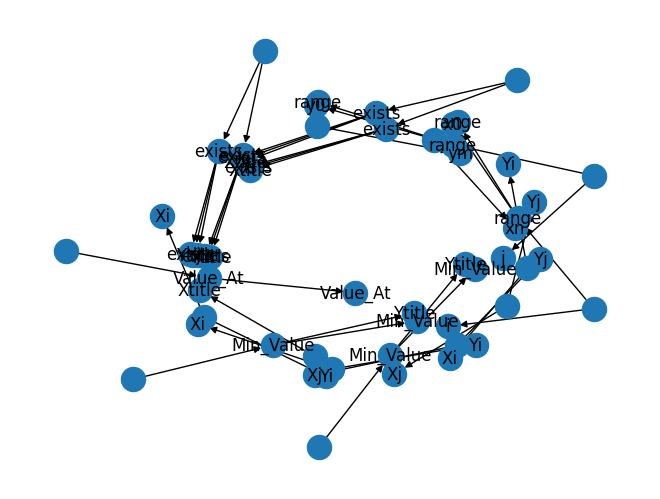

In [41]:
import ast
from sympy import symbols
import networkx as nx
import matplotlib.pyplot as plt

def parse_ast_to_nx_simple(node, G=None, parent_name=None, graph_label=None):
    if G is None:
        G = nx.DiGraph()

    # Get a unique name for the node
    if parent_name is not None:
        node_name = f"{parent_name}_{len(G)}"
    else:
        node_name = str(len(G))

    # Add node to the graph if it's a variable or predicate
    if isinstance(node, (ast.Name, ast.Call)):
        if isinstance(node, ast.Name):
            label_id = node.id
        elif isinstance(node, ast.Call):
            label_id = node.func.id
        else:
            label_id = None

        if label_id is not None:
            G.add_node(node_name, label=label_id, graph_label=graph_label)

            # Add edge between the current node and its parent
            if parent_name is not None:
                G.add_edge(parent_name, node_name)

    # Recursively add child nodes
    if isinstance(node, ast.AST):
        for child_name, child_node in ast.iter_fields(node):
            parse_ast_to_nx_simple(child_node, G, node_name, child_name)

    elif isinstance(node, list):
        for i, item in enumerate(node):
            parse_ast_to_nx_simple(item, G, parent_name, f"list[{i}]")

    return G



# Example usage
i, j, x0, xn, y0, ym, Xi, Xj, Xtitle, Yi, Yj, Ytitle = symbols('i j x0 xn y0 ym Xi Xj Xtitle Yi Yj Ytitle')

# Premises
premise1 = ast.parse("True")
premise2 = ast.parse(f"({i} in range({x0}, {xn} + 1)) and ({j} in range({y0}, {ym} + 1))")
premise3 = ast.parse(f"exists({Xi}, {Xtitle}) and exists({Xj}, {Xtitle})")
premise4 = ast.parse(f"exists({Yi}, {Ytitle}) and exists({Yj}, {Ytitle})")
premise5 = ast.parse(f"Value_At([Xi, Yi], [Xtitle])")
premise6 = ast.parse(f"Min_Value(({Xi}, {Yi}), {Ytitle})")
premise7 = ast.parse(f"Min_Value(({Xj}, {Yj}), {Ytitle})")
premise8 = ast.parse(f"({Xj}, {Yj}) - ({Xi}, {Yi}) > 0")

# Combine all premises
full_ast = ast.Module(body=[premise1, premise2, premise3, premise4, premise5, premise6, premise7, premise8])

# Parse AST to networkx graph
graph_simple = parse_ast_to_nx_simple(full_ast)

# Draw the simplified graph
if graph_simple.number_of_nodes() > 0:
    print(graph_simple.number_of_nodes())
    pos_simple = nx.kamada_kawai_layout(graph_simple)
    labels_simple = nx.get_edge_attributes(graph_simple, 'label')
    nx.draw(graph_simple, pos_simple, with_labels=True, labels=nx.get_node_attributes(graph_simple, 'label'))
    nx.draw_networkx_edge_labels(graph_simple, pos_simple, edge_labels=labels_simple)
    plt.show()
else:
    print("The simplified graph has 0 nodes and 0 edges.")


In [42]:
import matplotlib.pyplot as plt

# ... (Previous code)

# Draw the simplified graph with Kamada-Kawai layout and constraints
pos_simple = nx.kamada_kawai_layout(graph_simple, k=0.3)  # You can adjust the value of k
labels_simple = nx.get_edge_attributes(graph_simple, 'label')

plt.figure(figsize=(10, 8))  # You can adjust the size of the figure
nx.draw(graph_simple, pos_simple, with_labels=True, labels=nx.get_node_attributes(graph_simple, 'label'))
nx.draw_networkx_edge_labels(graph_simple, pos_simple, edge_labels=labels_simple)

plt.show()


TypeError: kamada_kawai_layout() got an unexpected keyword argument 'k'